
# Part A: Analytical Solutions of the Friedmann Equations

We are given the Friedmann equations for a flat universe:

$$
H^2 = \left( \frac{\dot{R}}{R} \right)^2 = \frac{8\pi G}{3} \rho
$$

$$
\frac{\ddot{R}}{R} = -\frac{4\pi G}{3}(1 + 3w)\rho
$$

with the continuity equation:

$$
\dot{\rho} = -3H(1 + w)\rho
$$

---

## Step 1: Solve the Continuity Equation

We start with the continuity equation:

$$
\dot{\rho} = -3(1+w)H\rho = -3(1+w)\frac{\dot{R}}{R}\rho
$$

This is separable:

$$
\frac{d\rho}{\rho} = -3(1+w)\frac{dR}{R}
\Rightarrow \rho \propto R^{-3(1+w)}
$$

---

## Step 2: Substitute into Friedmann Equation

Substitute \( \rho \propto R^{-3(1+w)} \) into:

$$
\left( \frac{\dot{R}}{R} \right)^2 \propto R^{-3(1+w)}
\Rightarrow \dot{R} \propto R^{1 - \frac{3}{2}(1+w)}
$$

This gives:

$$
\dot{R} = k R^n, \quad \text{where} \quad n = 1 - \frac{3}{2}(1+w)
$$

This is a separable equation. Integrating:

$$
\int R^{-n} dR = \int k dt
\Rightarrow R(t) \propto t^{\frac{2}{3(1+w)}}
$$

---

## Step 3: Solutions for Specific \( w \)

### \( w = 0 \) (Matter-dominated Universe)

$$
R(t) \propto t^{\frac{2}{3}}
$$

### \( w = 1 \) (Stiff Fluid)

$$
R(t) \propto t^{\frac{1}{3}}
$$

### \( w = -\frac{1}{3} \)

$$
R(t) \propto t
$$

---

## Summary

| \( w \)         | Universe Type     | \( R(t) \)          |
|------------------|------------------|---------------------|
| 0                | Matter-dominated | \( t^{2/3} \)       |
| 1                | Stiff fluid      | \( t^{1/3} \)       |
| -1/3             | Curvature-like   | \( t \)             |


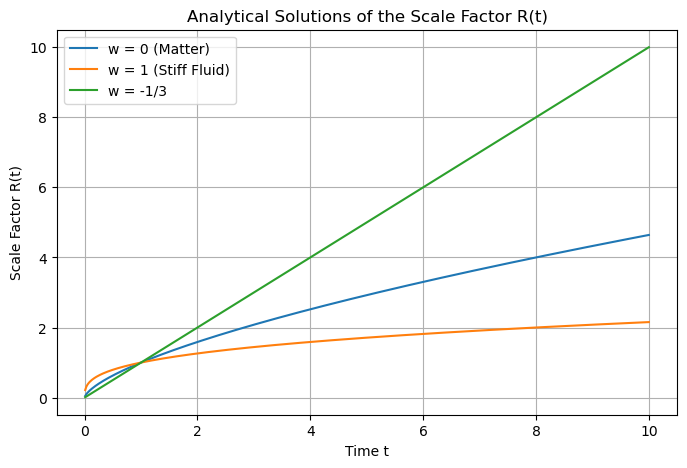

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Time array
t = np.linspace(0.01, 10, 500)

# Define scale factor R(t) for different w
def R(t, w):
    return t**(2 / (3 * (1 + w)))

# Values of w to consider
ws = [0, 1, -1/3]
labels = ['w = 0 (Matter)', 'w = 1 (Stiff Fluid)', 'w = -1/3']

# Plot
plt.figure(figsize=(8, 5))
for w, label in zip(ws, labels):
    plt.plot(t, R(t, w), label=label)

plt.title("Analytical Solutions of the Scale Factor R(t)")
plt.xlabel("Time t")
plt.ylabel("Scale Factor R(t)")
plt.legend()
plt.grid(True)
plt.show()

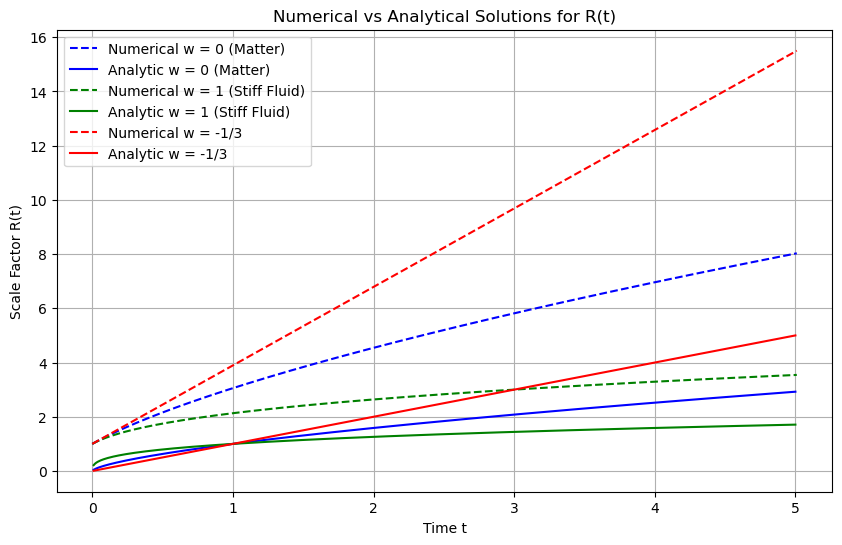

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 1.0  # Use scaled units
H0 = 1.0  # Normalize Hubble parameter at t=0
rho0 = 1.0  # Initial density
R0 = 1.0  # Initial scale factor
t_max = 5
dt = 0.01

# Friedmann equations in first-order ODE form
def Hubble(rho):
    return np.sqrt((8 * np.pi * G / 3) * rho)

def derivatives(R, rho, w):
    H = Hubble(rho)
    dRdt = H * R
    drhodt = -3 * H * (1 + w) * rho
    return dRdt, drhodt

# Runge-Kutta 4th order step
def rk4_step(R, rho, w, dt):
    k1_R, k1_rho = derivatives(R, rho, w)
    k2_R, k2_rho = derivatives(R + 0.5*dt*k1_R, rho + 0.5*dt*k1_rho, w)
    k3_R, k3_rho = derivatives(R + 0.5*dt*k2_R, rho + 0.5*dt*k2_rho, w)
    k4_R, k4_rho = derivatives(R + dt*k3_R, rho + dt*k3_rho, w)

    R_next = R + (dt/6)*(k1_R + 2*k2_R + 2*k3_R + k4_R)
    rho_next = rho + (dt/6)*(k1_rho + 2*k2_rho + 2*k3_rho + k4_rho)

    return R_next, rho_next

# Adaptive RK4
def solve_friedmann(w):
    t_values = [0]
    R_values = [R0]
    rho_values = [rho0]

    R, rho = R0, rho0
    t = 0
    while t < t_max:
        R, rho = rk4_step(R, rho, w, dt)
        t += dt
        R_values.append(R)
        rho_values.append(rho)
        t_values.append(t)

    return np.array(t_values), np.array(R_values)

# Analytical solution
def R_analytic(t, w):
    return t**(2 / (3 * (1 + w)))

# Plot results
ws = [0, 1, -1/3]
labels = ['w = 0 (Matter)', 'w = 1 (Stiff Fluid)', 'w = -1/3']
colors = ['blue', 'green', 'red']

plt.figure(figsize=(10, 6))

for w, label, color in zip(ws, labels, colors):
    t_vals, R_vals = solve_friedmann(w)
    t_vals_analytic = np.linspace(0.01, t_max, 500)
    R_vals_analytic = R_analytic(t_vals_analytic, w)

    plt.plot(t_vals, R_vals, '--', label=f'Numerical {label}', color=color)
    plt.plot(t_vals_analytic, R_vals_analytic, '-', label=f'Analytic {label}', color=color)

plt.title("Numerical vs Analytical Solutions for R(t)")
plt.xlabel("Time t")
plt.ylabel("Scale Factor R(t)")
plt.legend()
plt.grid(True)
plt.show()